# Multiple Linear Regression in Python

Welcome to the session on ‘Multiple Linear Regression in Python’. In the last session, you learnt about the various theoretical aspects of multiple linear regression. Now, let’s move on to building a multiple linear regression model in Python.

In this session
You will learn the generic steps that are required to build a multiple linear regression model. You will build this model for a **housing dataset** and **predict the price** of a house using the various potential predictor variables provided. You will first read and visualise your dataset and then prepare your data for building a linear model. This will include 

* dealing with categorical variables
* adding dummy variables,
* and scaling.
* You will then start building the model with a bottom-up approach, i.e., you will start with one variable and keep on adding more.
* Once all the variables have been added, you will perform a manual feature elimination
* and move on to the residual analysis and predictions, as usual.
* In the end, you will solve the same problem using RFE.

# Reading and Understanding the Data

Linear regression is used in various fields such as real estate, telecom, e-commerce, etc. to build predictive models. Let's look at one such example from the real estate industry. Here, you will **predict the price** of a house on the basis of some predictor variables, such as floor area, number of bedrooms, parking space, etc.



**Problem Statement:**

Consider that a real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.


**Essentially, the company wants:**

* To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
* To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
* To know the accuracy of the model, i.e. how well do these variables predict the house prices
  
Please find the Housing dataset [here](https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression/Multiple+Linear+Regression+in+Python/Housing.csv) and the Multiple Linear Regression notebook [here](https://github.com/ContentUpgrad/Linear-Regression/tree/main/Multiple%20Linear%20Regression%20in%20Python).

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
import statsmodels.api as sm

#for test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data

In [2]:
#Reading the data 
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# target variable is price
# rest all are predictor variable
# mostly preditors are catagorical variables

In [4]:
#check shape
housing.shape

(545, 13)

In [5]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#chek null values
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

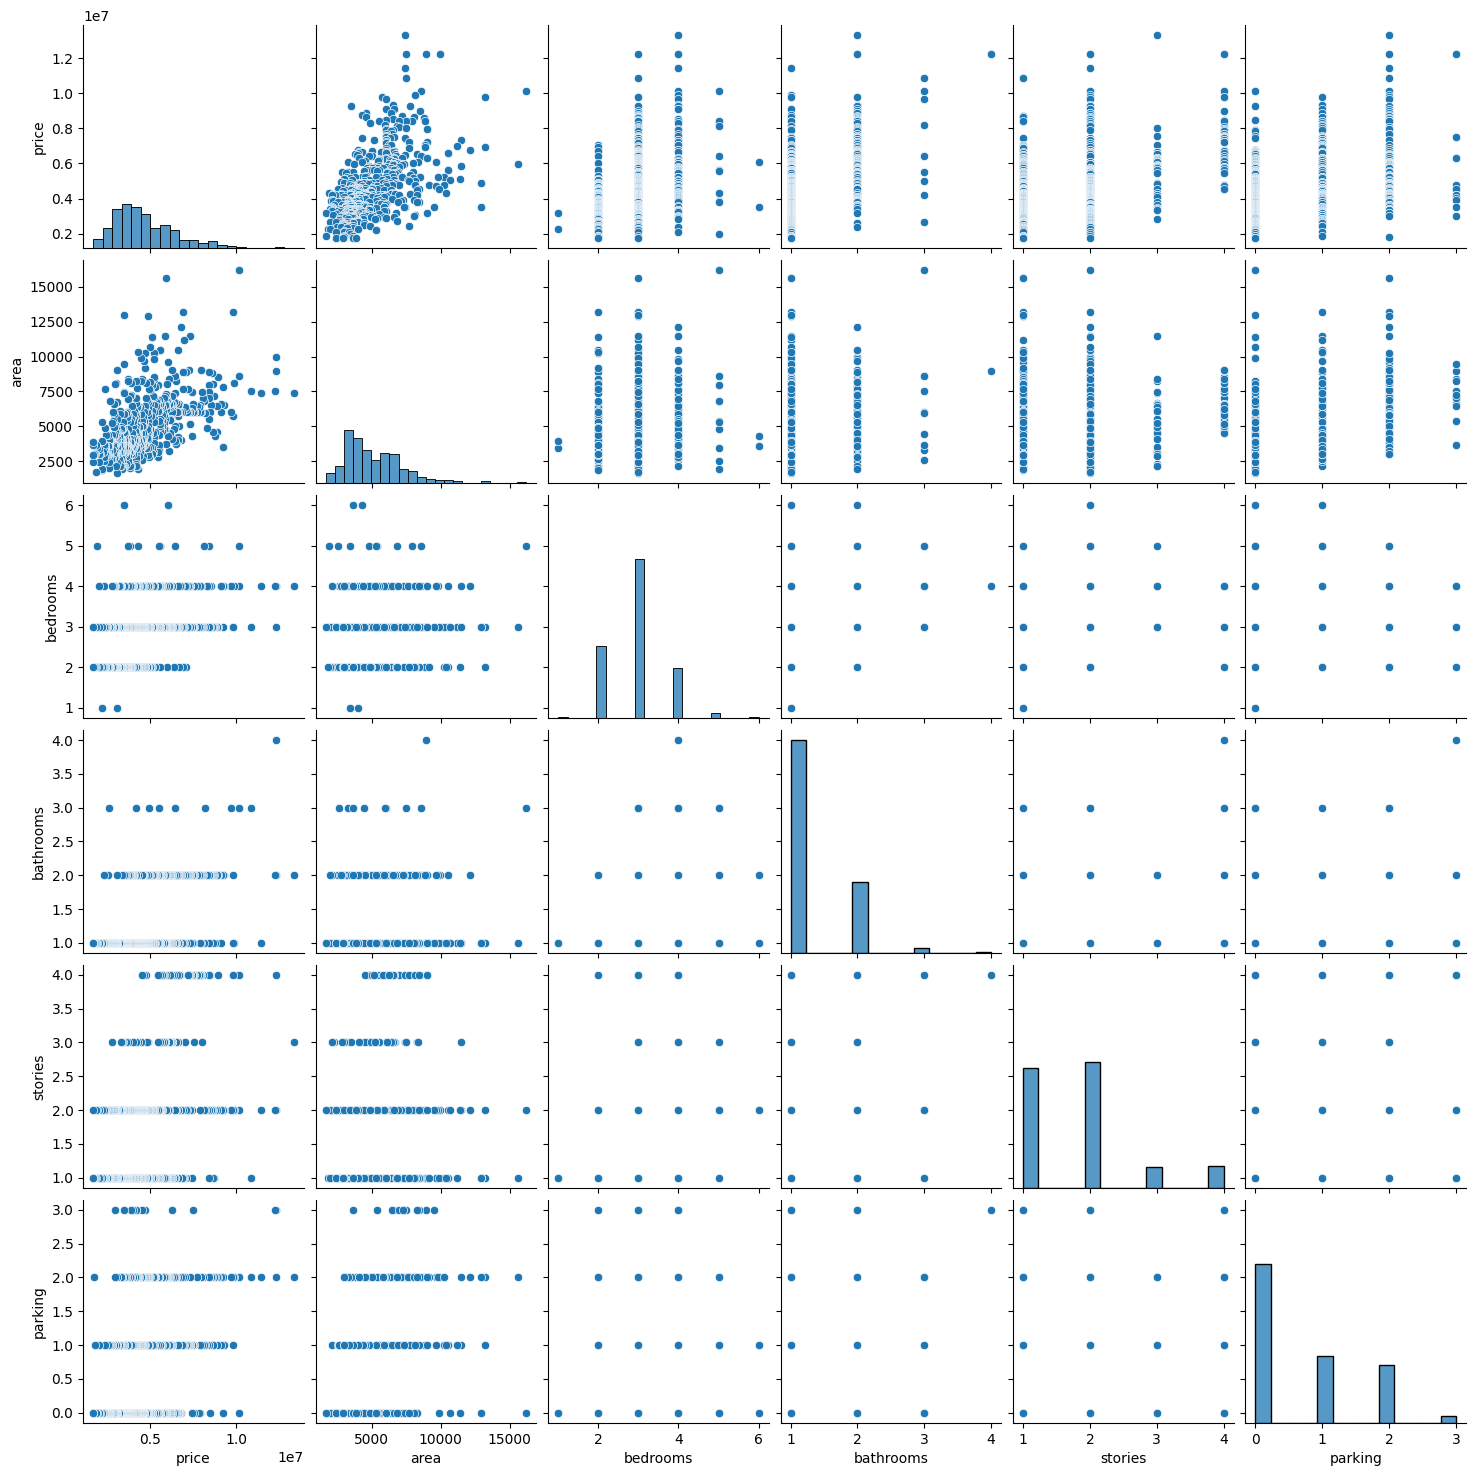

In [8]:
#visualising the numerical variables
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

#### subplot

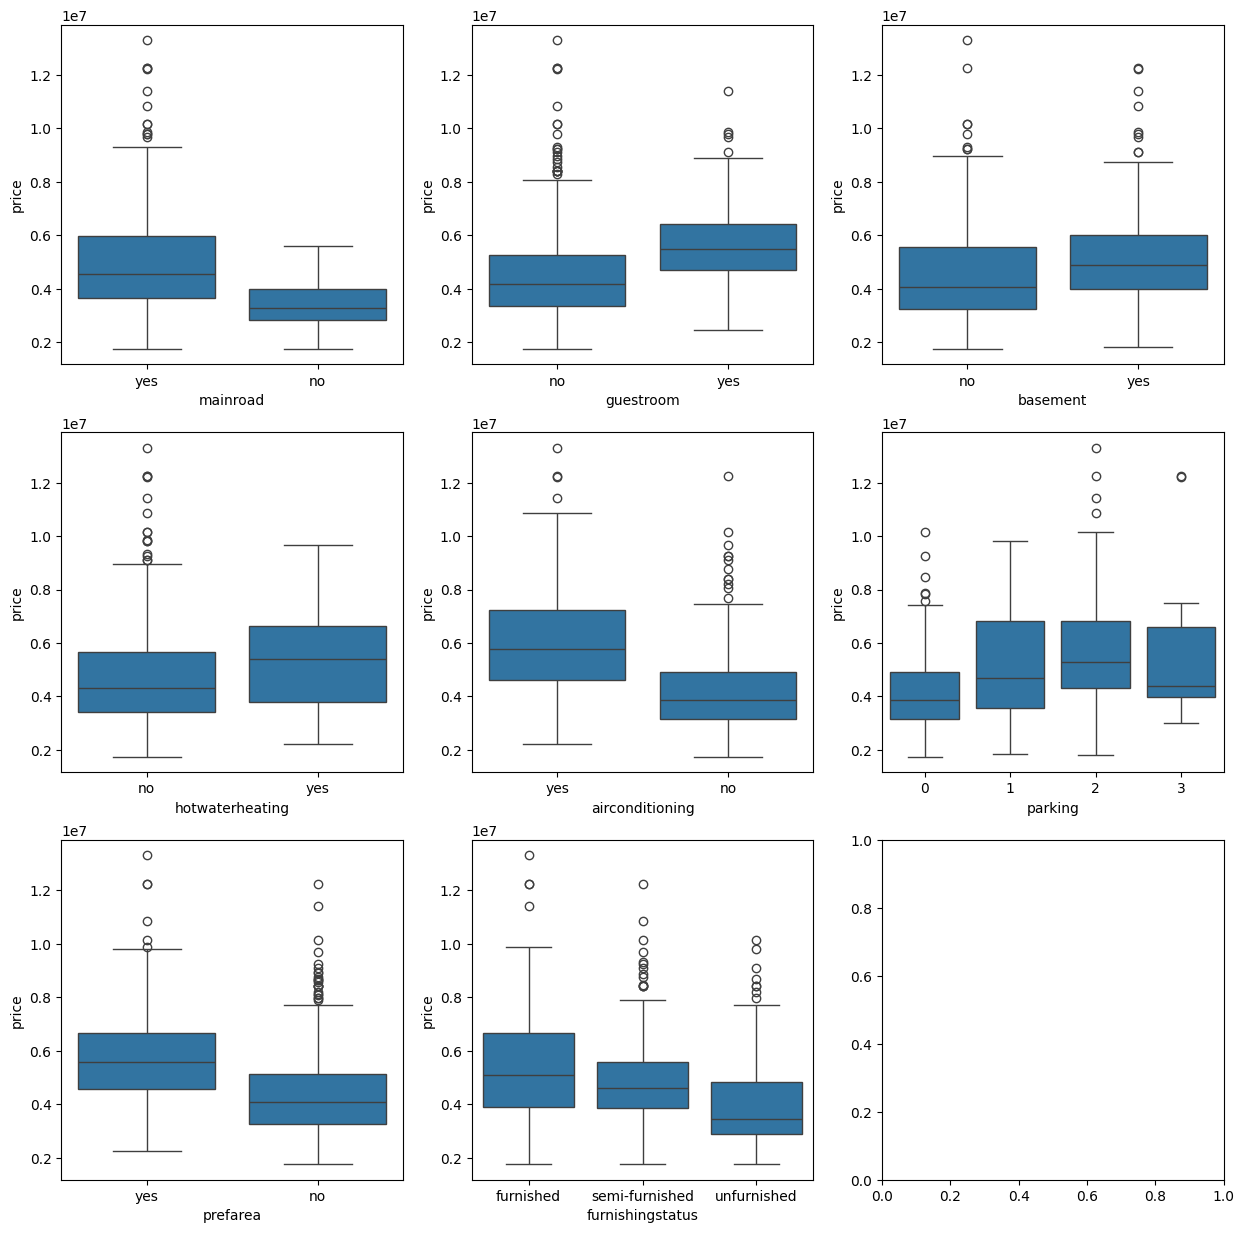

In [9]:
#catagotical variables:  mainroad	guestroom	basement	hotwaterheating	airconditioning	parking	prefarea	furnishingstatus
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(housing, x = 'mainroad', y = 'price')
plt.subplot(3,3,2)
sns.boxplot(housing, x = 'guestroom', y = 'price')
plt.subplot(3,3,3)
sns.boxplot(housing, x = 'basement', y = 'price')
plt.subplot(3,3,4)
sns.boxplot(housing, x = 'hotwaterheating', y = 'price')
plt.subplot(3,3,5)
sns.boxplot(housing, x = 'airconditioning', y = 'price')
plt.subplot(3,3,6)
sns.boxplot(housing, x = 'parking', y = 'price')
plt.subplot(3,3,7)
sns.boxplot(housing, x = 'prefarea', y = 'price')
plt.subplot(3,3,8)
sns.boxplot(housing, x = 'furnishingstatus', y = 'price')
plt.subplot(3,3,9)
plt.show()

### Hue in sns.boxplot
We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

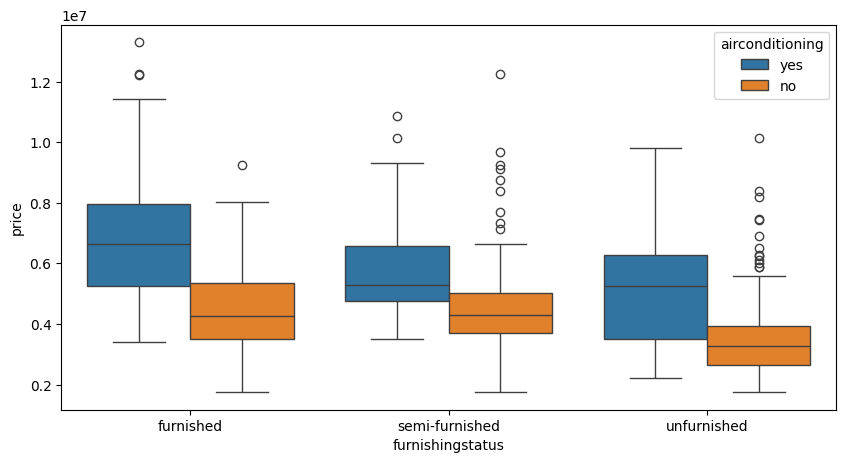

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [11]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [12]:
housing[varlist] =housing[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables
The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.


In [13]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

status = pd.get_dummies(housing.furnishingstatus).astype(int)

# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

    00 will correspond to furnished
    
    01 will correspond to unfurnished
    
    10 will correspond to semi-furnished

In [14]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing.furnishingstatus, drop_first=True).astype(int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
# Add the results to the original housing dataframe
housing = pd.concat([housing,status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [17]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], inplace=True, axis=1)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(housing, test_size=0.7, train_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(163, 14)
(382, 14)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

* Min-Max scaling
* Standardisation (mean-0, sigma-1)

  
This time, we will use MinMax scaling.

